In [1]:
import pump_probe

In [2]:
import numpy as np
import pandas as pd
import scipy as sci

from matplotlib import pyplot as plt

from matplotlib.pyplot import MultipleLocator

# 文件名和路径信息

In [3]:
f_path = 'data/power/' # 数据存储的路径

# 提取文件名中power或temperature的信息
power_from = 0 
power_to = -12

f_type = '.dat' # 文件类型

# 示波器上的读数
value_osc = 100

file_info = {
    "f_path":f_path,
    "para_from": power_from,
    "para_to": power_to,
    "f_type": f_type,
    "value_osc":value_osc
}


# 按通量（或温度）大小将文件排序

In [4]:
from pump_probe.filesort import file_sort

In [5]:
reverse = True # 从大到小排序（FALSE表示从小到大排序）
files, num_files, num_power_max = file_sort(file_info, reverse)

# 导入数据，储存在FileData class中

In [6]:
from pump_probe.samplingdata import SamplingData

In [7]:
fileData_list = []
i = 0
for file in files:
    file_name = file_info["f_path"] + file
    file_data = SamplingData(file, file_info)
    fileData_list.append(file_data)
    if i == num_power_max:
        peak_position = file_data.get_peak_position() # 在通量最大时取时间零点
    i += 1

# 数据预处理
- 将时间轴移至peak位置，利用`set_time_position_at_peak`方法实现，input为peak position
- 扣除时间零点来之前的背底，利用`set_value_to_zero`方法实现

In [8]:
for file_data in fileData_list:
    file_data.set_time_position_at_peak(peak_position) # 将time zero 设置在peak position的位置
    file_data.set_value_to_zero()

# 绘图

In [9]:
from pump_probe.plotfigure import PlotFigure

## 设置绘图 color bar的类型，目前可以选择 `rainbow` `rainbow_r`

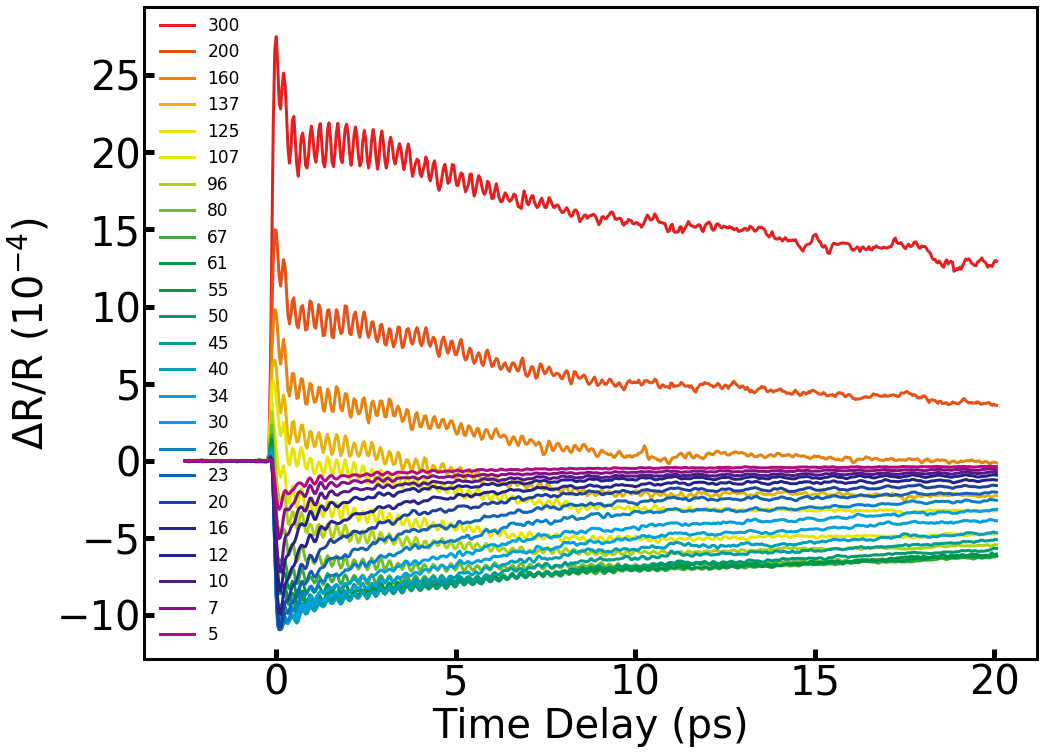

In [10]:
color_bar_style = "rainbow_r"
pf = PlotFigure(plt, fileData_list, num_files)
with_fit_lines = False
pf.plot_time_domain(color_bar_style, with_fit_lines)

# 双e指数拟合

In [11]:
def double_exp(x, b, c, p, q):
    x = np.array(x)
    return b*np.exp(p*x) + c*np.exp(q*x)

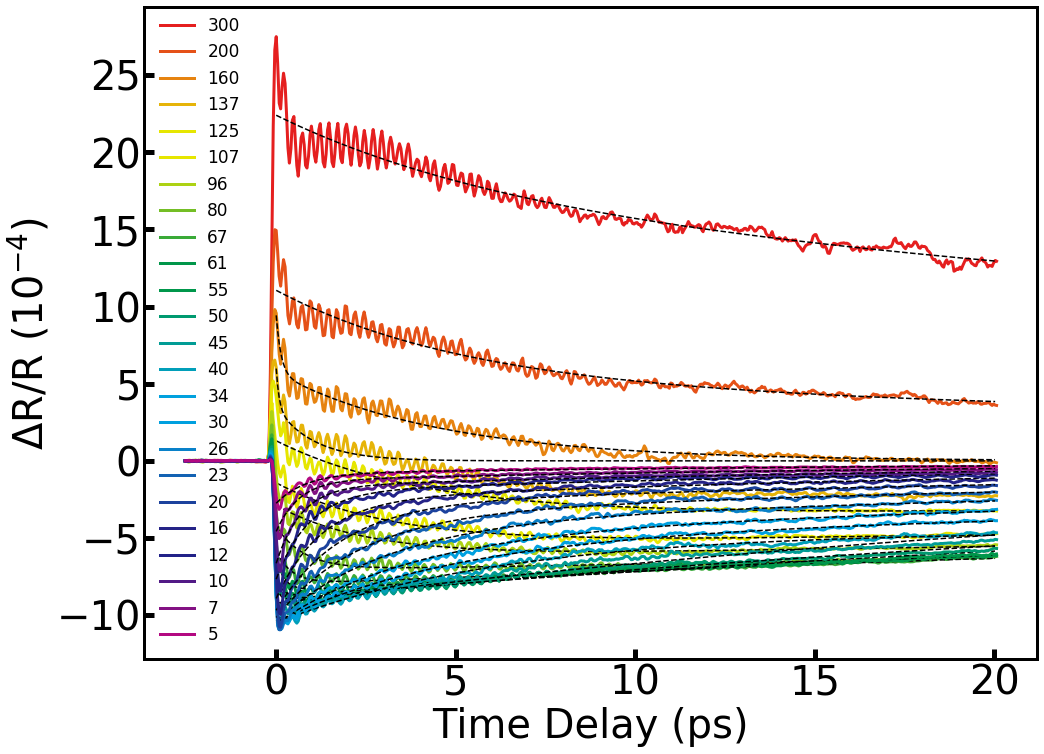

In [12]:
# 初始试探解
b_init = 1
c_init = 1
p_init = -1/10
q_init = -1/1

fit_para_init = [b_init, c_init, p_init, q_init]

for file_data in fileData_list:
    file_data.decay_fit(double_exp, fit_para_init)
    
with_fit_lines = True
pf.plot_time_domain(color_bar_style, with_fit_lines)

# 扣除背底后Fourier变换得到声子谱

In [13]:
fre_cutoff = 12
for file_data in fileData_list:
    file_data.fourier_transfer(fre_cutoff)

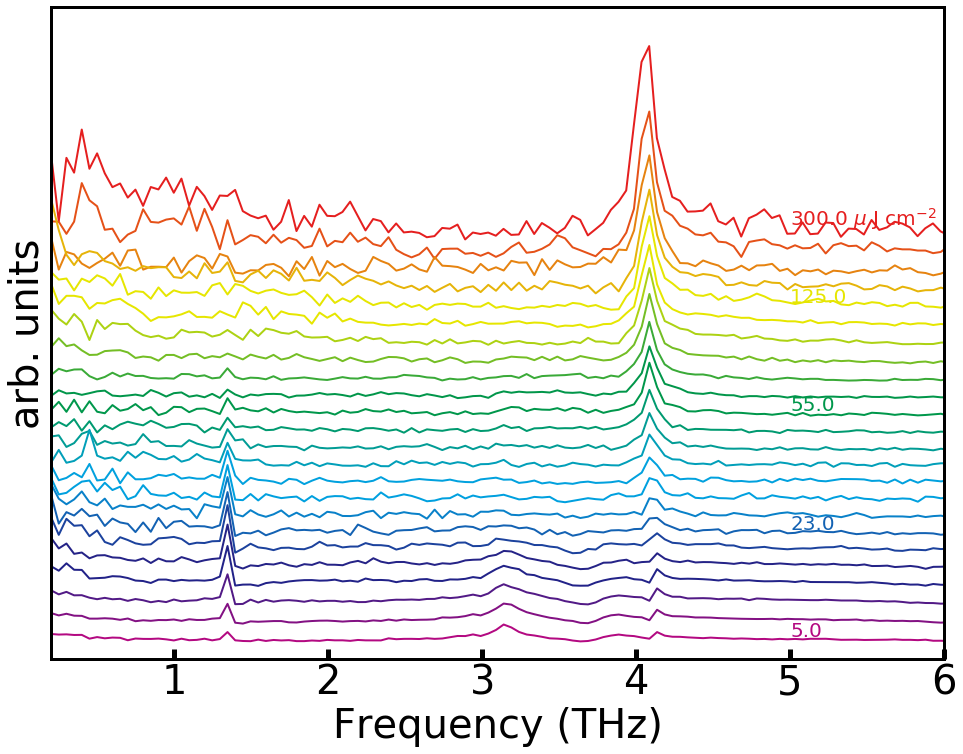

In [14]:
pf.plot_fre_domain(color_bar_style)

## 声子谱 Map

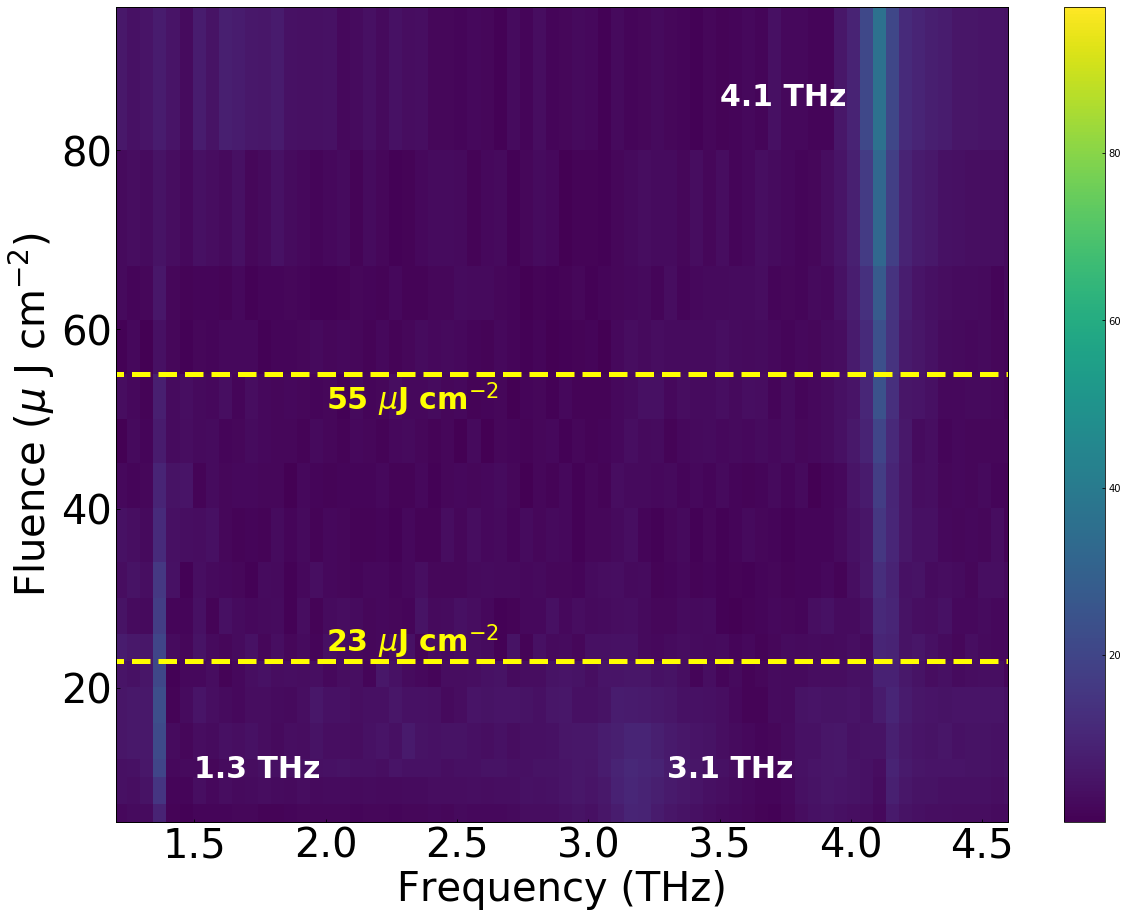

In [15]:
pf.plot_phonon_map()